In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv('Movie-Ratings-.csv')

In [3]:
len(movies)

559

In [4]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [6]:
# Adjustment
movies.columns = ['Film','Genre','CriticRating','AudienceRating','BudgetMillions','Year']

In [7]:
movies.head() # First 6 records

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 21.9+ KB


In [9]:
movies.describe()  # Year !!!!!!

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [10]:
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 17.6 KB


In [12]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [13]:
movies.Year.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

In [14]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [16]:
#JoinPlots

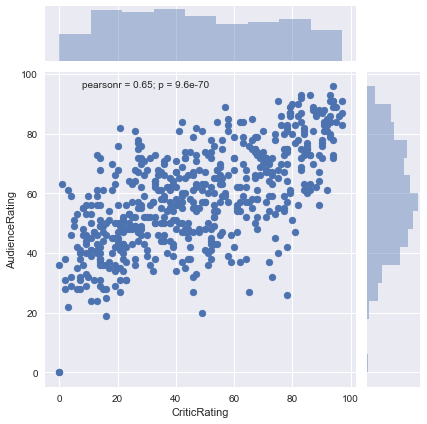

In [17]:
join1 = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')

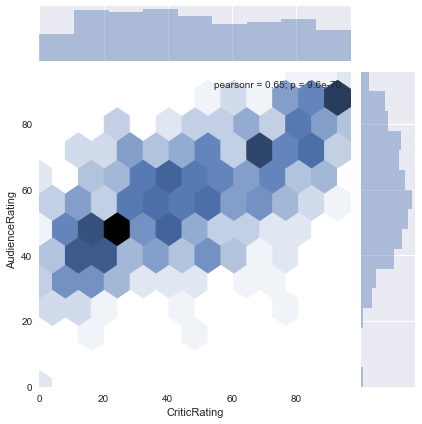

In [18]:
join2 = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')
#kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }, optiona  ---  Kind of plot to draw

# Histograms

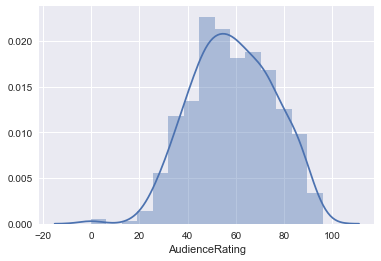

In [19]:
histo1 = sns.distplot(movies.AudienceRating, bins=15)

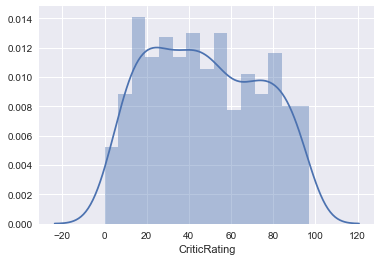

In [20]:
histo1 = sns.distplot(movies.CriticRating, bins=15)

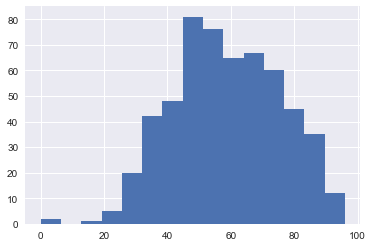

In [21]:
sns.set_style('darkgrid')
#sns.set_style('white')
n1 = plt.hist(movies.AudienceRating, bins=15)

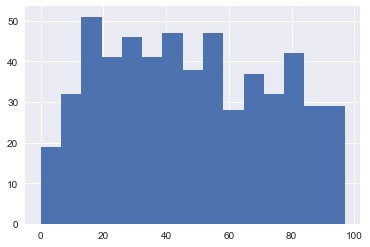

In [22]:
n1 = plt.hist(movies.CriticRating, bins=15 )

# Stacked Histogram

(array([ 25.,  40.,  18.,   8.,   6.,   2.,   1.,   0.,   0.,   1.]),
 array([   0.,   15.,   30.,   45.,   60.,   75.,   90.,  105.,  120.,
         135.,  150.]),
 <a list of 10 Patch objects>)

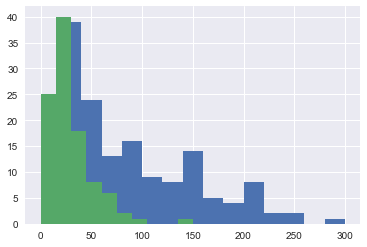

In [23]:
plt.hist(movies[movies.Genre == "Action"].BudgetMillions, bins=15) # plt.show()
plt.hist(movies[movies.Genre == "Drama"].BudgetMillions) # plt.show()

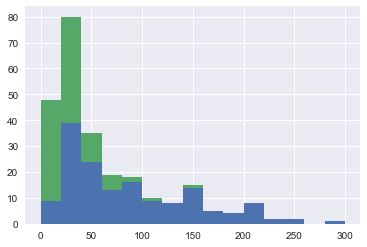

In [24]:
plt.hist([movies[movies.Genre == "Action"].BudgetMillions ,
          movies[movies.Genre == "Drama"].BudgetMillions],bins = 15 , stacked=True) 
plt.show()

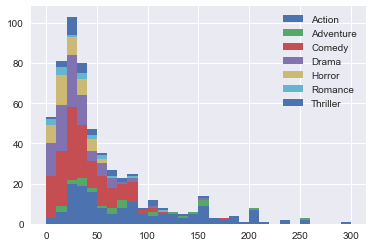

In [25]:
list1= list() # or list1= []
mylabel = list()
for gen in movies.Genre.cat.categories:
    list1.append( movies[movies.Genre == gen].BudgetMillions )
    mylabel.append(gen)

plt.hist(list1, bins=30 , stacked=True, rwidth=1 , label=mylabel) 
plt.legend()
plt.show()

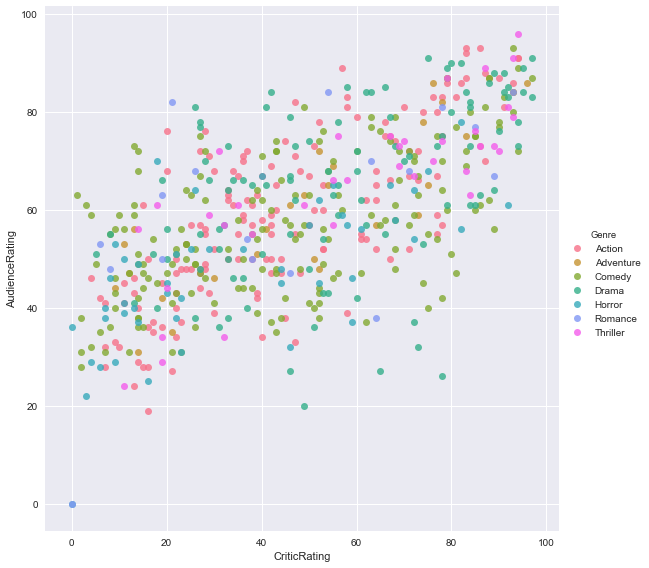

In [26]:
vis5 = sns.lmplot(data=movies , x='CriticRating', y='AudienceRating' , fit_reg=False , hue='Genre',
                 size=8 , aspect=1)

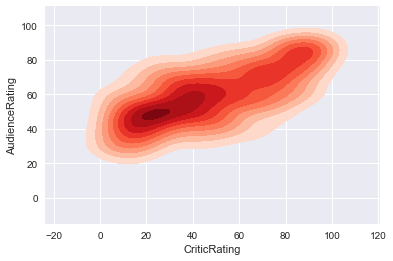

In [27]:
k1 = sns.kdeplot(movies.CriticRating,movies.AudienceRating,
                   shade=True , shade_lowest=False , cmap='Reds') # kernel density estimation  Plot
# Tipe
#k2 = sns.kdeplot(movies.CriticRating,movies.AudienceRating, 
#                  cmap='Reds') # kernel density estimation  Plot

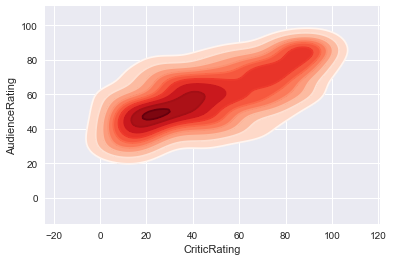

In [28]:
k1 = sns.kdeplot(movies.CriticRating,movies.AudienceRating,
                   shade=True , shade_lowest=False , cmap='Reds') # kernel density estimation  Plot
# Tipe
k2 = sns.kdeplot(movies.CriticRating,movies.AudienceRating, 
                   cmap='Reds') # kernel density estimation  Plot

# Working with Subplots()

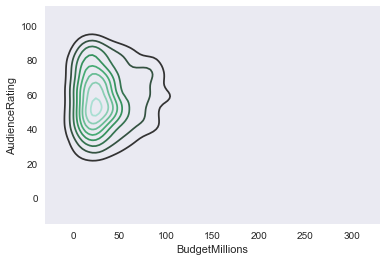

In [29]:
sns.set_style('dark')
k4 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating) # # Closer to normal dist

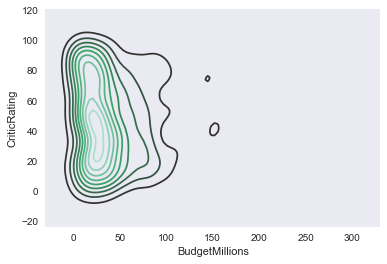

In [30]:
k5 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating) # # Closer to uniform dist

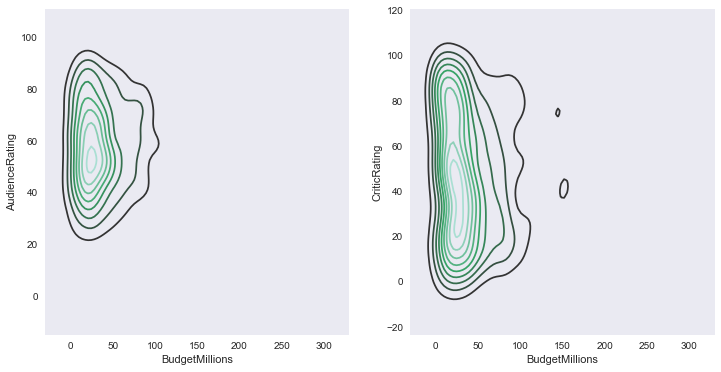

In [31]:
f, axes = plt.subplots(1, 2 , figsize=(12,6))
k4 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating , ax=axes[0])
k5 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating , ax=axes[1])
# F IS THE FIGURE 
# axes is ana array of length 2

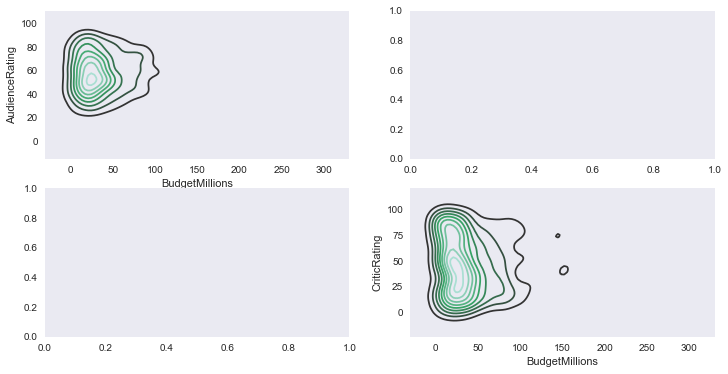

In [32]:
f, axes = plt.subplots(2, 2 , figsize=(12,6))
k4 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating , ax=axes[0,0])
k5 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating , ax=axes[1,1])
# F IS THE FIGURE 
# axes is ana array of length 2

[(-20, 160)]

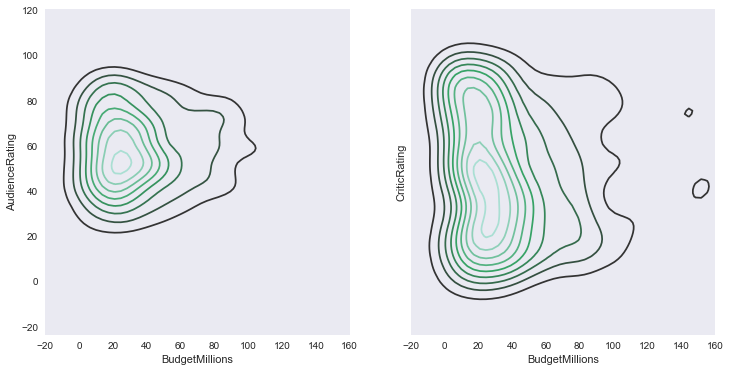

In [33]:
f, axes = plt.subplots(1, 2 , figsize=(12,6), sharex=True, sharey=True)
k4 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating , ax=axes[0])
k5 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating , ax=axes[1])
k4.set(xlim=(-20,160))
#k4.set(xlim=(-20,160)) sharex is more better 
# F IS THE FIGURE 
# axes is ana array of length 2


# Violinplot VS Boxplots

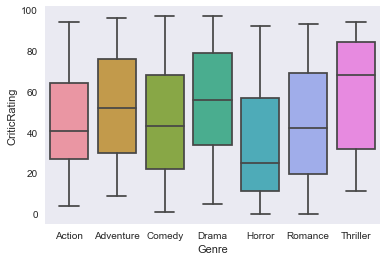

In [34]:
first = sns.boxplot(data=movies , x='Genre' , y='CriticRating')

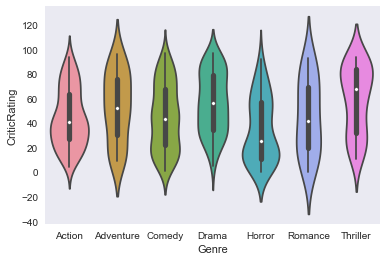

In [35]:
second = sns.violinplot(data=movies , x='Genre' , y='CriticRating')
# Width tells you the number of points in the area

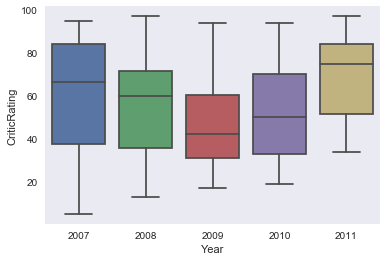

In [36]:
DramaOnlyBox = sns.boxplot(data=movies[movies.Genre=='Drama'] , x='Year' , y='CriticRating')

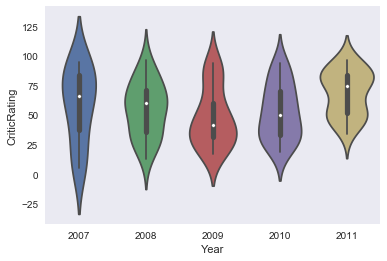

In [37]:
DramaOnlyViolin = sns.violinplot(data=movies[movies.Genre=='Drama'] , x='Year' , y='CriticRating')

# vilonplots are better in visualisation

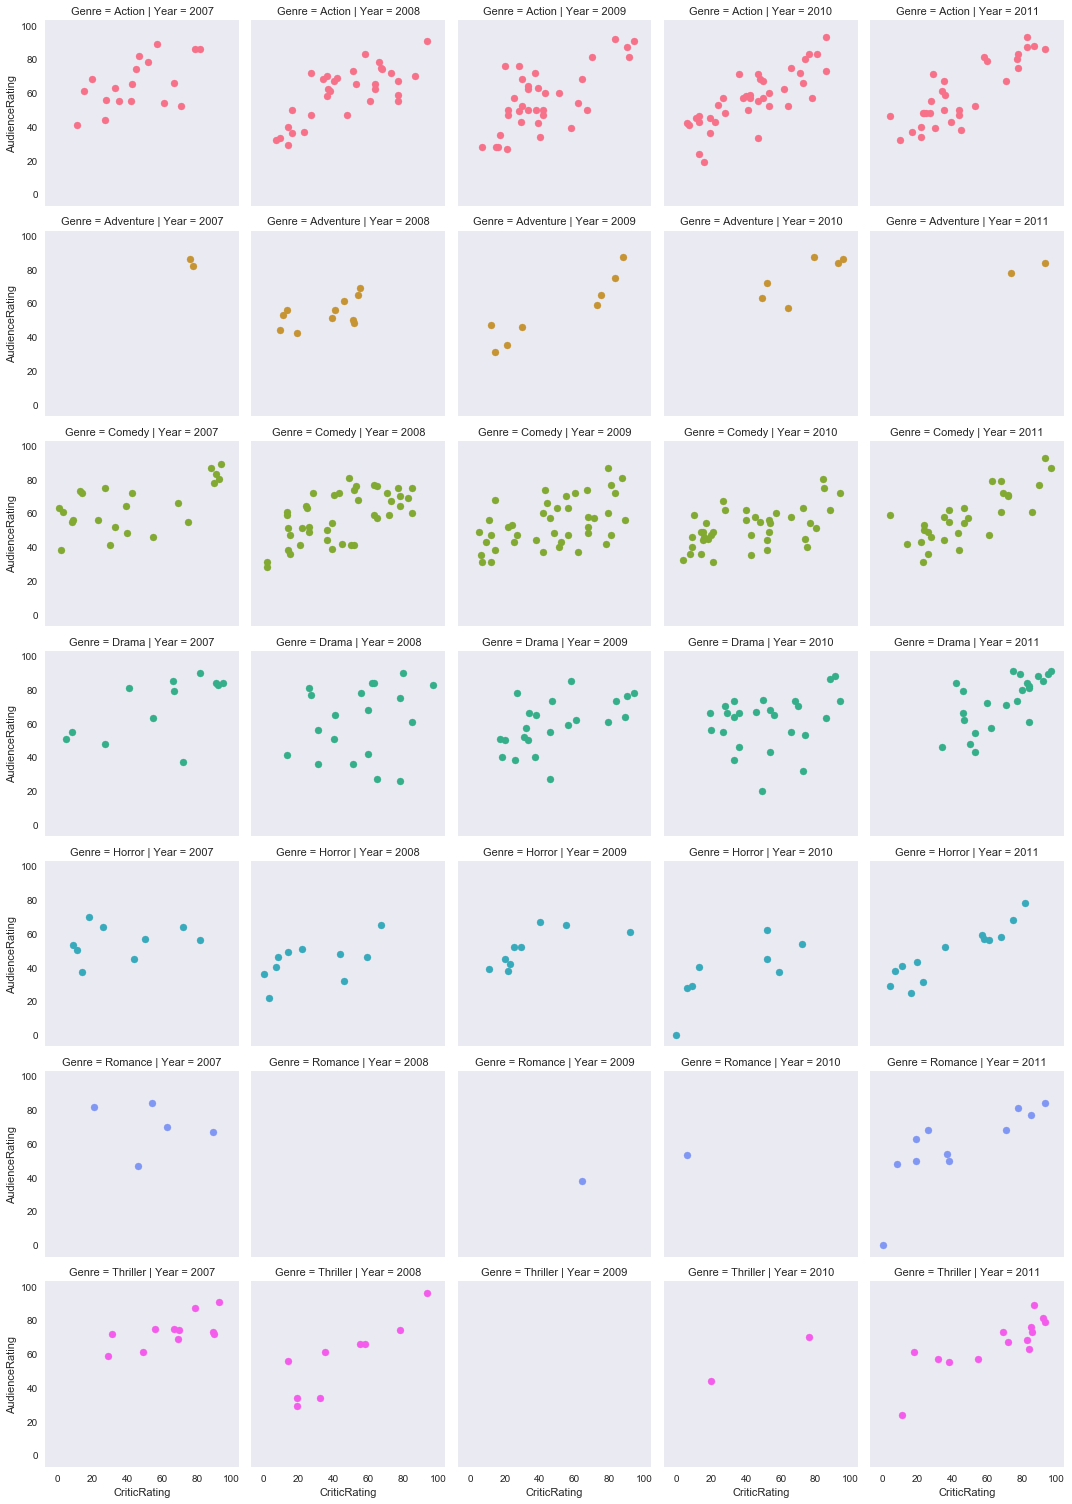

In [38]:
g = sns.FacetGrid(movies, row='Genre', col='Year' ,hue='Genre')
g = g.map(plt.scatter, 'CriticRating' , 'AudienceRating') # this is mapping 

# can populate with any much type of charts

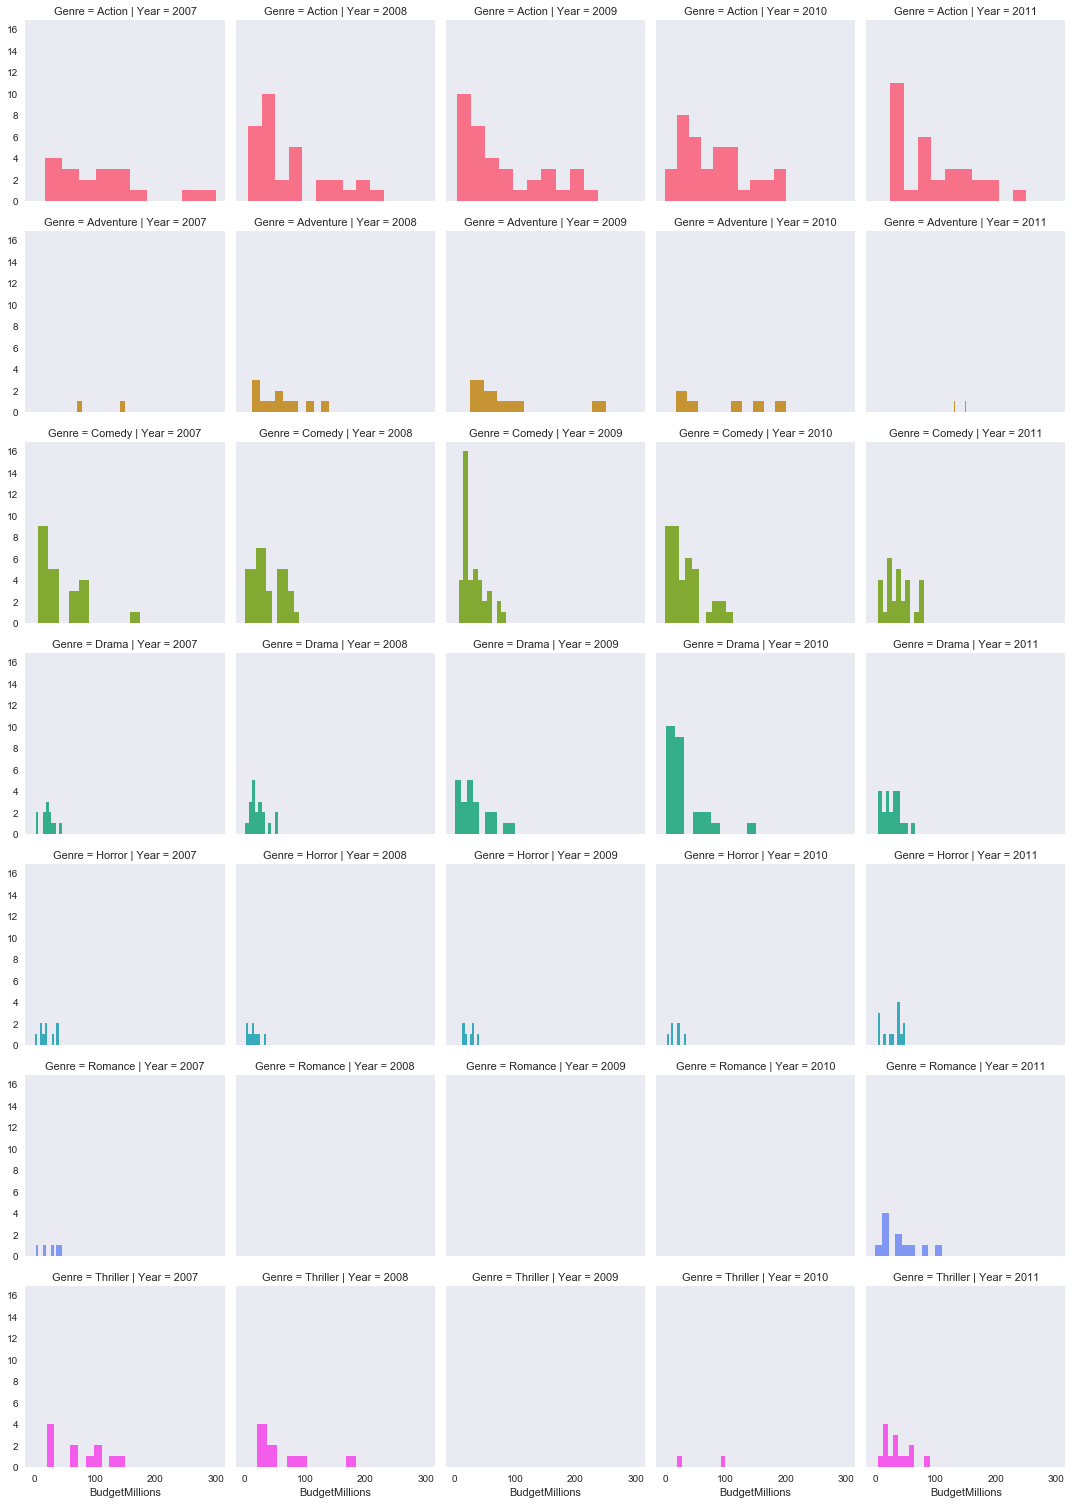

In [39]:
g1 = sns.FacetGrid(movies, row='Genre', col='Year' ,hue='Genre')
g1 = g1.map(plt.hist, 'BudgetMillions' ) 

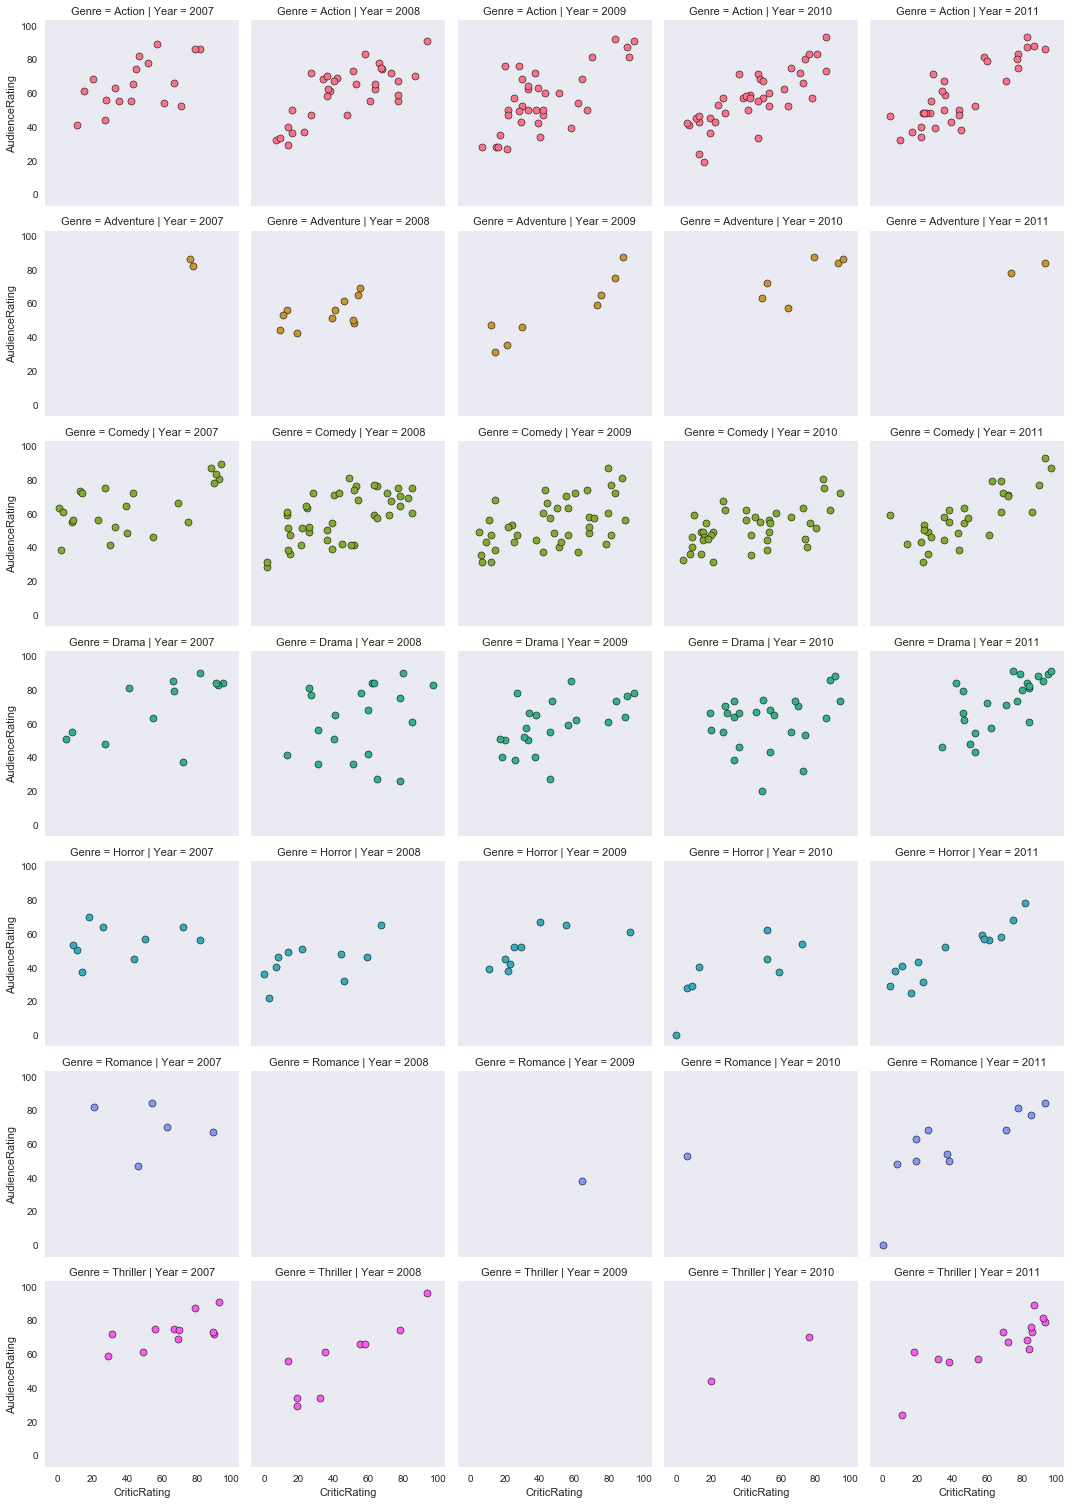

In [40]:
g3 = sns.FacetGrid(movies, row='Genre', col='Year' ,hue='Genre')
kws = dict(s=50, linewidth=0.5 , edgecolor='black' )  
g3 = g3.map(plt.scatter, 'CriticRating' , 'AudienceRating', **kws)  

In [41]:
kws

{'edgecolor': 'black', 'linewidth': 0.5, 's': 50}

# Coordinates and Diagonals

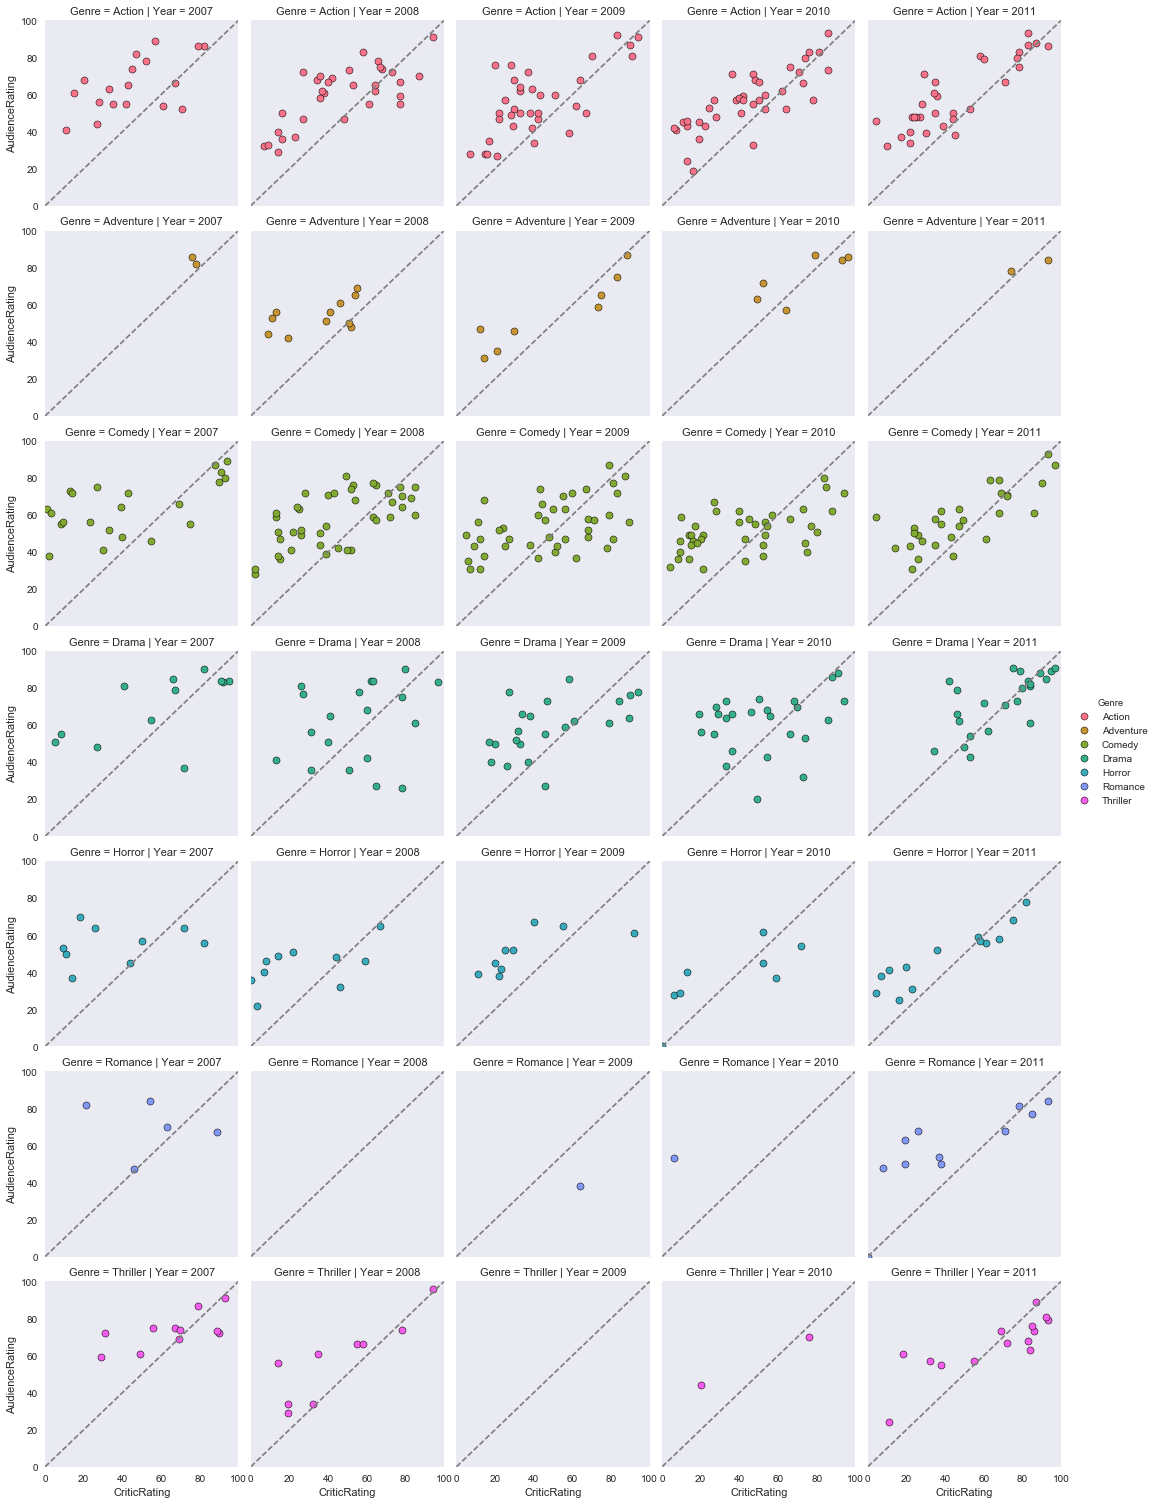

In [42]:
# controling axes and Diagonals
g3 = sns.FacetGrid(movies, row='Genre', col='Year' ,hue='Genre')
kws = dict(s=50, linewidth=0.5 , edgecolor='black' )  
g3 = g3.map(plt.scatter, 'CriticRating' , 'AudienceRating', **kws)  
g3.set(xlim=(0,100),ylim=(0,100))
for ax in g3.axes.flat:
    ax.plot((0,100),(0,100), c='gray' , ls='--')
g3.add_legend()

# Building Dashboards in Python

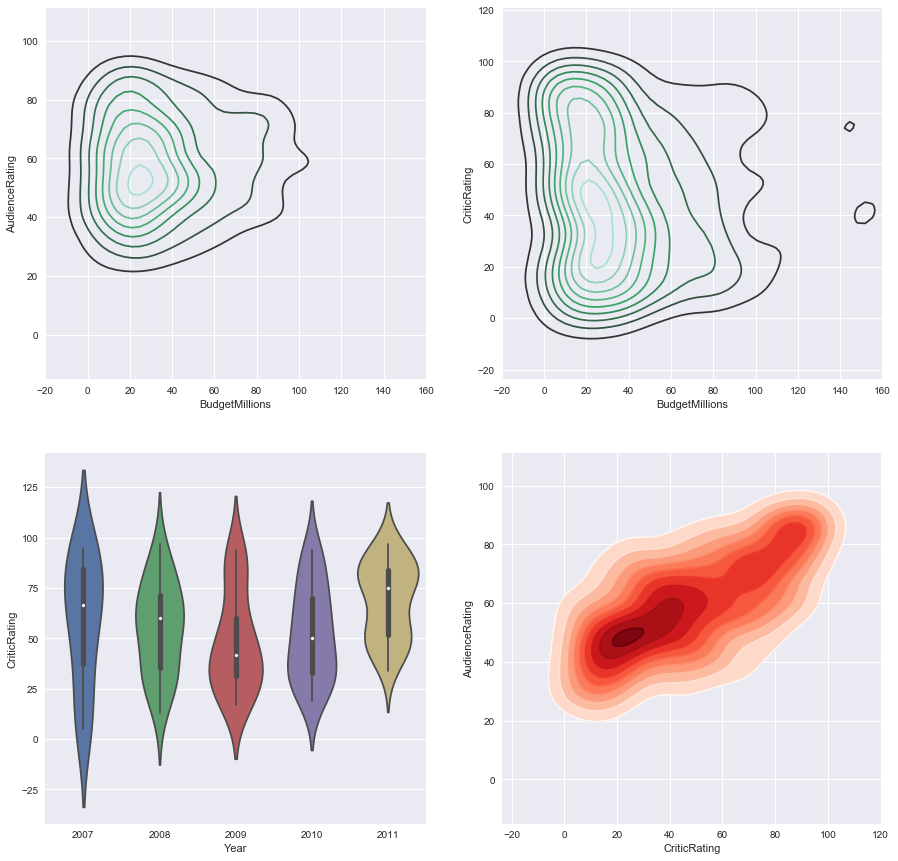

In [43]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2, 2 , figsize=(15,15))

k1 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating , ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating , ax=axes[0,1])
z1 = sns.violinplot(data=movies[movies.Genre=='Drama'] , x='Year' , y='CriticRating',ax=axes[1,0])
z2 = sns.kdeplot(movies.CriticRating,movies.AudienceRating,shade=True , shade_lowest=False , cmap='Reds',ax=axes[1,1]) 
z2 = sns.kdeplot(movies.CriticRating,movies.AudienceRating,cmap='Reds') 

#n1 = plt.hist(movies.CriticRating, bins=15 ,ax=axes[1,1]) # will not work because it just to the seaborn only
#axes[1,1].hist(movies.CriticRating, bins=15) # this is works and vice versa will not work :D !! 
# because axes is Pyplot object 

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

# Styling Tips 

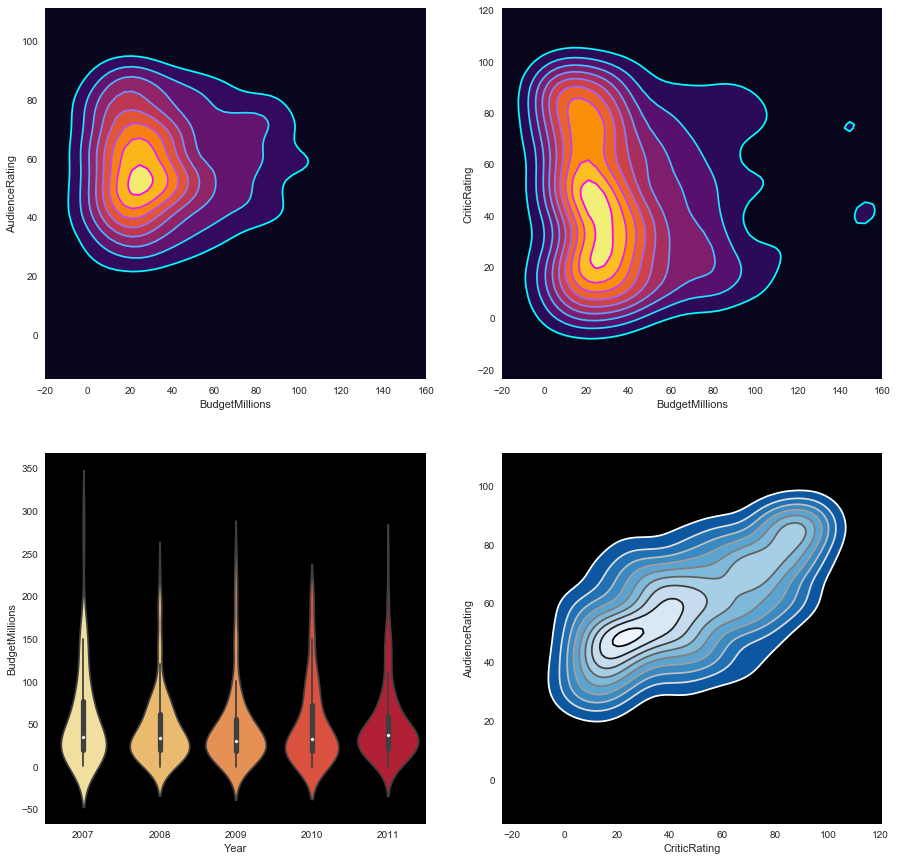

In [44]:
sns.set_style("dark", {"axes.facecolor": "black"})
f, axes = plt.subplots(2, 2 , figsize=(15,15))

# plot [0,0]
k1 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating ,
                 shade=True, shade_lowest=True, cmap='inferno', ax=axes[0,0])
k11 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating ,
                  cmap='cool', ax=axes[0,0])

# plot [0,1]
k2 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating , 
                  shade=True, shade_lowest=True, cmap='inferno', ax=axes[0,1])
k22 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating ,
                  cmap='cool', ax=axes[0,1])
# plot [1,0]
z1 = sns.violinplot(data=movies, x='Year' , y='BudgetMillions',
                   palette='YlOrRd', ax=axes[1,0])

# plot [1,1]
z2 = sns.kdeplot(movies.CriticRating,movies.AudienceRating,shade=True , shade_lowest=False , cmap='Blues_r',ax=axes[1,1]) 
z22 = sns.kdeplot(movies.CriticRating,movies.AudienceRating,cmap='gist_gray_r') 


k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

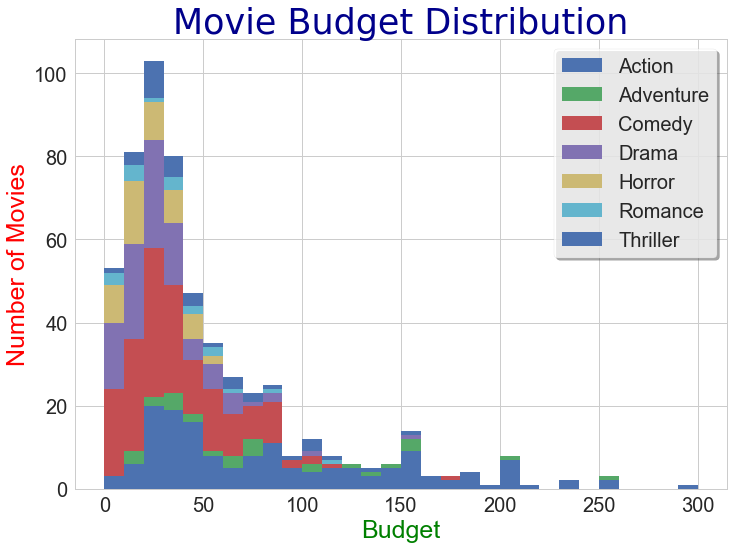

In [45]:
list1= list() # or list1= []
mylabel = list()
for gen in movies.Genre.cat.categories:
    list1.append( movies[movies.Genre == gen].BudgetMillions )
    mylabel.append(gen)

sns.set_style("whitegrid")    
fig, axes = plt.subplots()
fig.set_size_inches(11.7 , 8.27) # Size of A4 Paper
plt.hist(list1, bins=30 , stacked=True, rwidth=1 , label=mylabel) 
plt.title('Movie Budget Distribution', fontsize=35, color='DarkBlue', fontname='Console')
plt.ylabel('Number of Movies',fontsize=25, color='Red')
plt.xlabel('Budget',fontsize=25, color='Green')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(prop={'size':20}, frameon=True, fancybox=True , shadow=True, framealpha=0.75)
plt.show()